# Chapter 4: A visual proof that neural nets can compute any function

## Two caveats

## Universality with one input and one output

## Many input variables

### Problem 1 ([link](http://neuralnetworksanddeeplearning.com/chap4.html#problem_863961)): approximate any arbitrary function with just a single hidden layer

Let's consider only 2 input variables, $x$ and $y$, and a real-valued function.

First, why did we need that second hidden layer before, instead of simply adding our tower functions together to approximate $\sigma^{-1} \circ f(x,y)$ for the weighted input of our last neuron, giving $f(x,y)$ as the output of our network?

The reason is that we need to get rid of the plateaus associated with each tower, with a bias of $-3 \frac h 2$ (or $(-m+ \frac 1 2)h$, in $m$ dimensions):

![img/tower_and_plateaus.png](img/tower_and_plateaus.png)

Since the towers have different heights, we have to define different biases for different towers, and therefore a single output neuron won't be enough: we need a second hidden layer. How do we circumvent this limitation?

Following Nielsen's hints:

**(a) it's possible to get step functions not just in the $x$ or $y$ directions, but in an arbitrary direction**

We already know how to get step functions in the $x$ direction or $y$ direction (going through any couple of points $(x_0, y_0)$ by adjusting the bias). What about a step function along the line going through $(0, y_0)$ with an angle to the absciss $\alpha \in \mathopen] -\pi, \pi \mathclose[ \backslash \{ -\pi/2, \pi/2\}$?

The corresponding line equation is $y = x \tan \alpha + y_0$.

We fix $w_x$ to be a large value, and want to determine $w_y$ and $b$ such that the weighted input $z = w_x x + w_y y + b$ is equal to 0 (so the output activation will be $0.5$) on the line $y = x \tan \alpha + y_0$.

This translates to:

$$\forall x \in \mathbb{R}, w_x x + w_y x \tan \alpha + w_y y_0 + b = 0$$

$$\forall x \in \mathbb{R}, \left( w_x + w_y \tan \alpha \right) x + \left( w_y y_0 + b \right) = 0$$

Which implies, since $\left( w_x + w_y \tan \alpha \right)$ and $\left( w_y y_0 + b \right)$ are constant, that:

\begin{eqnarray}
  \left\{ 
    \begin{array}{ll} 
      w_x + w_y \tan \alpha &= 0 \\
      w_y y_0 + b &= 0
    \end{array}
  \right.
\end{eqnarray}

\begin{eqnarray}
  \iff \left\{ 
    \begin{array}{ll} 
      w_y &= - \frac{w_x}{\tan \alpha} \\
      b &= \frac{y_0 w_x}{\tan \alpha}
    \end{array}
  \right.
\end{eqnarray}

Then for every point $(x, y)$ at a distance $d$ below the line, with a little geometry we can compute that $y = (x - d) \tan \alpha + y_0$, so the value of the sigmoid function on this point is:

$$\sigma\left( w_x x - \frac{w_x}{\tan \alpha} ((x-d) \tan \alpha + y_0) + \frac{y_0 w_x}{\tan \alpha} \right) = \sigma(w_x d)$$

So we have a good step function. Let's plot one ($w_x = 10, \alpha = \pi / 20, y_0 = 1$):



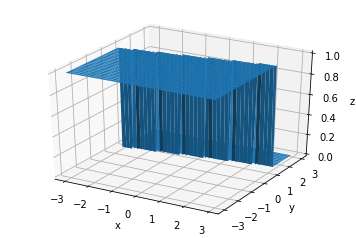

In [2]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def plot(x, y, zs):
    """Plot zs as a function of x and y"""
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    Z = zs.reshape(X.shape)
    ax.plot_surface(X, Y, Z)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    plt.show()

def step(wx, x, y, y0, alpha):
    wy = - wx / np.tan(alpha)
    b = y0 * wx / np.tan(alpha)
    return sigmoid(wx*x + wy*y + b)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

wx = 100  # any large value
alpha = np.pi / 20  # rad
y0 = 1  # the line will pass through the point (0, y0)

x = y = np.arange(-3.0, 3.0, 0.05)
X, Y = np.meshgrid(x, y)
zs = np.array([step(wx, x, y, y0, alpha) for x, y in zip(np.ravel(X), np.ravel(Y))])
plot(x, y, zs)

Now we just have to add 2 of these step functions with different $y_0$ and opposite weights to get a bump function.

Again, a little geometry shows that to create a bump of angle $\alpha$ to the absciss, of width $R$ and centered around $(x_0, y_0)$, we need to subtract step functions both of angle $\alpha$ and going through $(0, y_0 - x_0 \tan \alpha + \frac{R}{2\cos\alpha})$ and $(0, y_0 - x_0 \tan \alpha - \frac{R}{2\cos\alpha})$.

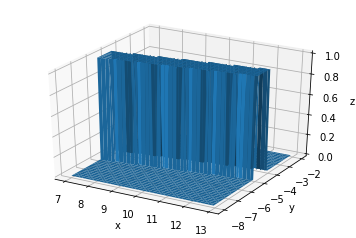

In [3]:
def bump(x, y, wx, x0, y0, alpha, R):
    """Bump function of width R, angle alpha to the absciss,
    centered around (x0, y0).
    alpha must be in [0, 2pi[."""
    if alpha == 0 or alpha == np.pi:
        return ybump(x, y, wx, x0, y0, R)
    if alpha == np.pi / 2 or alpha == 3 * np.pi/2:
        return xbump(x, y, wx, x0, y0, R)
    
    wy = - wx / np.tan(alpha)
    y01 = y0 - x0 * np.tan(alpha) + R / (2 * np.cos(alpha))
    y02 = y0 - x0 * np.tan(alpha) - R / (2 * np.cos(alpha))
    
    if alpha > np.pi:
        y01, y02 = y02, y01  # to prevent a negative bump
    
    b1 = y01 * wx / np.tan(alpha)
    b2 = y02 * wx / np.tan(alpha)
    return sigmoid(wx*x + wy*y + b1) - sigmoid(wx*x + wy*y + b2)

def xbump(x, y, w, x0, y0, R):
    """Bump function of width R, centered around (x0, y0),
    along the x axis."""
    return sigmoid(w*(x - x0 + R/2)) - sigmoid(w*(x - x0 - R/2))

def ybump(x, y, w, x0, y0, R):
    """Bump function of width R, centered around (x0, y0),
    along the y axis."""
    return sigmoid(w*(y - y0 + R/2)) - sigmoid(w*(y - y0 - R/2))

wx = 100  # any large value
alpha = np.pi/20 # rad
R = 1
x0 = 10
y0 = -5

x = np.arange(7, 13, 0.05)
y = np.arange(-8, -2, 0.05)
X, Y = np.meshgrid(x, y)
zs = np.array([bump(x, y, wx, x0, y0, alpha, R) for x, y in zip(np.ravel(X), np.ravel(Y))])
plot(x, y, zs)

To adjust the height of our bump function, we'll use the weights going from those 2 neurons to the output neuron, which doesn't require a second hidden layer.

**(b) by adding up many of the constructions from part (a) it's possible to approximate a tower function which is circular in shape, rather than rectangular**

Suppose we want a circular tower of diameter $R$ and height 1 (then constructing a tower of any height will be easy), centered in the point $(x_0, y_0)$. We'll use a large number $m$ of the previous bump functions of height $\frac 1 m$, of width $R$ and uniformly distributed angles $\alpha$ to the absciss: $\alpha \in \left\{ 0, 1 \times \frac{2\pi}{m}, 2 \times \frac{2\pi}{m}, \ldots, (m-1) \times \frac{2\pi}{m} \right\}$.

Here's an example with $m = 30$:

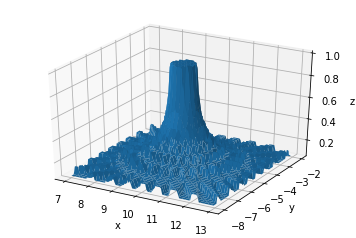

In [4]:
def bumps(x, y, wx, x0, y0, R, m):
    """Return a sum of m bump functions centered around (x0, y0)
    and with angles uniformly distributed in [0, 2pi["""
    total = 0
    alphas = [i*2*np.pi/m for i in range(m)]
    for alpha in alphas:
        total += bump(x, y, wx, x0, y0, alpha, R)
    return total/m

wx = 100  # any large value
R = 1
x0 = 10
y0 = -5
m = 30

x = np.arange(7, 13, 0.05)
y = np.arange(-8, -2, 0.05)
X, Y = np.meshgrid(x, y)
zs = np.array([bumps(x, y, wx, x0, y0, R, m) for x, y in zip(np.ravel(X), np.ravel(Y))])
plot(x, y, zs)

In the limit as $m \rightarrow +\infty$, we will have a cylinder of height 1 and diameter $R$, surrounded by a function proportional to the fraction of angles having activated the considered point. This function will only depend on its distance $d$ to the point $(x_0, y_0)$, not its precise coordinates.

One can show (with a drawing and some geometry) that this fraction is $\frac{4}{\pi} \arctan \frac{R}{2d}$.

This means that as $m \rightarrow +\infty$, we tend toward this function:

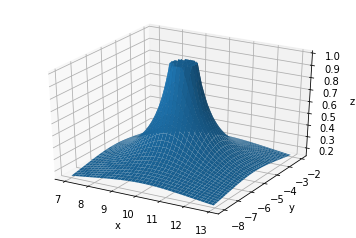

In [5]:
def limit(x, y, x0, y0, R):
    """Limit function of our approximation procedure"""
    d = np.sqrt((x - x0)**2 + (y - y0)**2)
    if 2*d <= R:
        return 1
    else:
        return 4 / np.pi * np.arctan(R/(2*d))

R = 1
x0 = 10
y0 = -5

x = np.arange(7, 13, 0.05)
y = np.arange(-8, -2, 0.05)
X, Y = np.meshgrid(x, y)
zs = np.array([limit(x, y, x0, y0, R) for x, y in zip(np.ravel(X), np.ravel(Y))])
plot(x, y, zs)

**(c) using these circular towers, it's possible to approximate an arbitrary function**

TODO

## Extension beyond sigmoid neurons

### Problem 2 ([link](http://neuralnetworksanddeeplearning.com/chap4.html#problems_963556)): universality of ReLU neurons

Recall that a rectified linear unit (ReLU) neuron with weighted input $z$ returns an activation equal to $\max(0, z)$:

![img/relu.png](img/relu.png)

These neurons don't satisfy the condition of a finite limit as $z \rightarrow + \infty$.

However, we can find an adapted proof of universality for them.

We'll only need to show that one can compute a step function in 1 dimension with 2 ReLU neurons (when only 1 sigmoid neuron was needed), then the remaining of the proof in chapter 4 will apply.

Consider an input $x$. We have two ReLU neurons of parameters $(w_1, b_1)$ and $(w_2, b_2)$.

Suppose we want a step at absciss $x = s$, of height $h$.

Take $w_1$ to be a large value, and $w_2 = w_1$.

We'll subtract one function from the other, the only difference between them being a tiny offset making our step function. More specifically, we want the first neuron to begin growing at $x = s$, i.e. $w_1 s + b_1 = 0$. So set $b_1 = - w_1 s$.

Now we want a height $h$, knowing that our first neuron output grows at a speed of $w_1$. This means we must compensate it beginning at $x = s + \frac{h}{w_1}$. Therefore we want $w_2 \left( s + \frac{h}{w_1} \right) + b_2 = 0$, i.e. $b_2 = - w_1 s - h$.

Finally, weigh the output of the first neuron at 1, and the output of the second one at -1. That's it, we've got a step function in the limit as $w_1 \rightarrow + \infty$.

Demo with $w_1 = 10, s = 2, h = 3$:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

def step(w1, s, h, x):
    return first_relu(w1, s, h, x) - second_relu(w1, s, h, x)

def first_relu(w1, s, h, x):
    b1 = - w1 * s
    return relu(w1 * x + b1)

def second_relu(w1, s, h, x):
    w2 = w1
    b2 = - w1 * s - h
    return relu(w2 * x + b2)

def relu(x):
    return max(x, 0)

w1 = 10  # any large value
s = 2  # absciss of the beginning of the step
h = 3  # height of the step

X = np.arange(-1.0, 5.0, 0.05)
Y1 = np.array([first_relu(w1, s, h, x) for x in X])
Y2 = np.array([- second_relu(w1, s, h, x) for x in X])
Y = np.array([step(w1, s, h, x) for x in X])

plt.ylim(bottom=-5, top=5)
plt.plot(X, Y1, label="First ReLU")
plt.plot(X, Y2, label="Second ReLU (negatively weighted)")
plt.plot(X, Y, label="Sum: step function")
plt.legend()
plt.show()

### Problem 3: non-universality of linear neurons

Linear neurons ($s(z) = z$) don't satisfy the finite limits as $z \rightarrow - \infty$ and $z \rightarrow + \infty$.

In a neural network made of linear neurons, each neuron only ever computes a weighted combination of the outputs of the neurons of the previous layers plus a bias: $z_j^l = \sum\limits_k w_{jk}^l a_k^{l-1} + b_j^l$.

The output of the first layer will be linear in the input for each neuron. Then the weighted inputs (and so the outputs) of all neurons in the second layer will be linear, etc. Our network will only ever be able to compute linear functions.

Linear neurons can't therefore be used to do universal computation.

## Fixing up the step functions

## Conclusion